## Italian Civil Protection Covid-19 Regional Data Analysis
***

Table of Contents

- [Read Data with pandas](#read)
- [Pandas swiss knife](#pandas)
- [Data selection](#selection)
- [Data manipulation](#manipulation)
- [Plotting](#plots)

In [1]:
%run setup.ipynb

### Read Data with Pandas <a class='anchor' id='read'></a>

In [2]:
# Constructs the full file path for the CSV file
path = os.path.join(DATA_PATH, "dpc-covid19-ita-regioni.csv")
    
try:
    with open(path, "r") as file:
        regioni = pd.read_csv(file)
        regioni.drop(columns=['note','codice_nuts_1','codice_nuts_2','note_test','note_casi'], inplace=True)
        regioni.data = regioni.data.apply(lambda L: L.partition('T')[0])
        regioni['data']=pd.to_datetime(regioni['data'])
        regioni['DateIndex'] = regioni['data']
        regioni.set_index(['codice_regione','DateIndex'], inplace=True)
        regioni.sort_index(level=[0,1], inplace=True)
        #regioni.sort_values([regioni.index.name,'data'], inplace=True)
except FileNotFoundError:
    print("The specified CSV file was not found.")


regioni.head()

data stato denominazione_regione        lat  \
codice_regione DateIndex                                                      
1              2020-02-24 2020-02-24   ITA              Piemonte  45.073274   
               2020-02-25 2020-02-25   ITA              Piemonte  45.073274   
               2020-02-26 2020-02-26   ITA              Piemonte  45.073274   
               2020-02-27 2020-02-27   ITA              Piemonte  45.073274   
               2020-02-28 2020-02-28   ITA              Piemonte  45.073274   

                               long  ricoverati_con_sintomi  \
codice_regione DateIndex                                      
1              2020-02-24  7.680687                       2   
               2020-02-25  7.680687                       2   
               2020-02-26  7.680687                       2   
               2020-02-27  7.680687                       2   
               2020-02-28  7.680687                       7   

                           terapia_intensiva  totale_ospedalizzati  \
codice_regione DateIndex                                             
1              2020-02-24                  0                     2   
               2020-02-25                  0                     2   
               2020-02-26                  0                     2   
               2020-02-27                  0                     2   
               2020-02-28                  0                     7   

                           isolamento_domiciliare  totale_positivi  ...  \
codice_regione DateIndex                                            ...   
1              2020-02-24                       1                3  ...   
               2020-02-25                       1                3  ...   
               2020-02-26                       1                3  ...   
               2020-02-27                       0                2  ...   
               2020-02-28                       4               11  ...   

                           casi_da_sospetto_diagnostico  casi_da_screening  \
codice_regione DateIndex                                                     
1              2020-02-24                           NaN                NaN   
               2020-02-25                           NaN                NaN   
               2020-02-26                           NaN                NaN   
               2020-02-27                           NaN                NaN   
               2020-02-28                           NaN                NaN   

                           totale_casi  tamponi  casi_testati  \
codice_regione DateIndex                                        
1              2020-02-24            3      141           NaN   
               2020-02-25            3      141           NaN   
               2020-02-26            3      156           NaN   
               2020-02-27            2      156           NaN   
               2020-02-28           11      227           NaN   

                           ingressi_terapia_intensiva  \
codice_regione DateIndex                                
1              2020-02-24                         NaN   
               2020-02-25                         NaN   
               2020-02-26                         NaN   
               2020-02-27                         NaN   
               2020-02-28                         NaN   

                           totale_positivi_test_molecolare  \
codice_regione DateIndex                                     
1              2020-02-24                              NaN   
               2020-02-25                              NaN   
               2020-02-26                              NaN   
               2020-02-27                              NaN   
               2020-02-28                              NaN   

                           totale_positivi_test_antigenico_rapido  \
codice_regione DateIndex                                            
1              2020-02-24                  

<br>

### Data Selection <a class='anchor' id='selection'></a>

In [3]:
reg_selection = ['Lombardia', 'Veneto', 'Piemonte', 'Liguria','Emilia-Romagna','Toscana', 'Marche']
reg_selection = regioni[regioni['denominazione_regione'].isin(reg_selection)]
#reg_selection.set_index(['denominazione_regione','data'], inplace=True)
display(reg_selection.head())

file_path = f'{DATA_PATH}/regioni_selection.csv'
with open(file_path, "w") as f:
    reg_selection.to_csv(f)

data stato denominazione_regione        lat  \
codice_regione DateIndex                                                      
1              2020-02-24 2020-02-24   ITA              Piemonte  45.073274   
               2020-02-25 2020-02-25   ITA              Piemonte  45.073274   
               2020-02-26 2020-02-26   ITA              Piemonte  45.073274   
               2020-02-27 2020-02-27   ITA              Piemonte  45.073274   
               2020-02-28 2020-02-28   ITA              Piemonte  45.073274   

                               long  ricoverati_con_sintomi  \
codice_regione DateIndex                                      
1              2020-02-24  7.680687                       2   
               2020-02-25  7.680687                       2   
               2020-02-26  7.680687                       2   
               2020-02-27  7.680687                       2   
               2020-02-28  7.680687                       7   

                           terapia_intensiva  totale_ospedalizzati  \
codice_regione DateIndex                                             
1              2020-02-24                  0                     2   
               2020-02-25                  0                     2   
               2020-02-26                  0                     2   
               2020-02-27                  0                     2   
               2020-02-28                  0                     7   

                           isolamento_domiciliare  totale_positivi  ...  \
codice_regione DateIndex                                            ...   
1              2020-02-24                       1                3  ...   
               2020-02-25                       1                3  ...   
               2020-02-26                       1                3  ...   
               2020-02-27                       0                2  ...   
               2020-02-28                       4               11  ...   

                           casi_da_sospetto_diagnostico  casi_da_screening  \
codice_regione DateIndex                                                     
1              2020-02-24                           NaN                NaN   
               2020-02-25                           NaN                NaN   
               2020-02-26                           NaN                NaN   
               2020-02-27                           NaN                NaN   
               2020-02-28                           NaN                NaN   

                           totale_casi  tamponi  casi_testati  \
codice_regione DateIndex                                        
1              2020-02-24            3      141           NaN   
               2020-02-25            3      141           NaN   
               2020-02-26            3      156           NaN   
               2020-02-27            2      156           NaN   
               2020-02-28           11      227           NaN   

                           ingressi_terapia_intensiva  \
codice_regione DateIndex                                
1              2020-02-24                         NaN   
               2020-02-25                         NaN   
               2020-02-26                         NaN   
               2020-02-27                         NaN   
               2020-02-28                         NaN   

                           totale_positivi_test_molecolare  \
codice_regione DateIndex                                     
1              2020-02-24                              NaN   
               2020-02-25                              NaN   
               2020-02-26                              NaN   
               2020-02-27                              NaN   
               2020-02-28                              NaN   

                           totale_positivi_test_antigenico_rapido  \
codice_regione DateIndex                                            
1              2020-02-24                  

In [4]:
reg_selection.isnull().sum(0)

data                                         0
stato                                        0
denominazione_regione                        0
lat                                          0
long                                         0
ricoverati_con_sintomi                       0
terapia_intensiva                            0
totale_ospedalizzati                         0
isolamento_domiciliare                       0
totale_positivi                              0
variazione_totale_positivi                   0
nuovi_positivi                               0
dimessi_guariti                              0
deceduti                                     0
casi_da_sospetto_diagnostico              6489
casi_da_screening                         6489
totale_casi                                  0
tamponi                                      0
casi_testati                               385
ingressi_terapia_intensiva                1981
totale_positivi_test_molecolare           2282
totale_positi

## Data Manipulation <a class='anchor' id='manipulation'></a>

In [5]:
def std_columns(pop_dict, df, col_names):
    # Loop through each column name in the list of column names
    for col_name in col_names:
        # Create a new column name by adding '_100k' to the original column name
        new_col_name = col_name + '_100k'
        # Create a new column with the new column name and fill it with NaN values
        df[new_col_name] = np.NAN

        # Loop through each region and its corresponding population in the population dictionary
        for region, pop in pop_dict.items():
            # Calculate the new values for the new column for the current region
            # by dividing the values in the original column by the population and multiplying by 100,000
            # Round the result to 2 decimal places
            new_values = np.round((df[col_name] / pop) * 100000, 2)
            # Update the new column with the new values for the current region
            df[new_col_name][df['denominazione_regione'] == region] = new_values

    # Return the updated DataFrame
    return df


We want to compute a 7-days moving average for the 'New Positives' column between each region.
Considering a 7-day moving average for the "New Positives" variable in COVID data analysis can help to reduce the noise or fluctuations in the data and provide a more accurate representation of the underlying trend.

The daily number of new COVID cases can be affected by various factors such as *testing capacity, reporting delays, and fluctuations in the spread of the virus.* This can result in **large fluctuations in the daily numbers that may not necessarily reflect the true trend of the outbreak.** By calculating the moving average over a period of 7 days, these fluctuations can be smoothed out, and the underlying trend of the outbreak can be better visualized. 

The `rolling()` function in Pandas can be used to compute rolling statistics over a specified window size. In this case, we want to compute the rolling average of the `"nuovi_positivi"` column for each region over a window size of 7 days. 
This code groups the DataFrame by `"denominazione_regione"` and then applies the `rolling()` function to the `"nuovi_positivi"` column for each group with a window size of 7 days. The resulting object is a Pandas Series with hierarchical index containing the rolling average values for each day and region.

The hierarchical index of the Pandas series returned by the first line of code would consist of three levels. The first level would correspond to the 'denominazione_regione' column, which is the region name, since the original DataFrame was grouped by this column. The second level would correspond to the 'codice_regione' column of the original DataFrame, and the third level would correspond to the datetime index of the original DataFrame.

To extract the rolling average values from the Series and add them as a new column to the original DataFrame, we can use the .`reset_index()` function to **remove the groupby index from the Series** and then use pd.concat() to show that we can concatenate the original DataFrame and a new DataFrame containing the rolling average values.

In [6]:
display(reg_selection.groupby('denominazione_regione')['nuovi_positivi'].rolling(7).mean().tail(8))
reseind = reg_selection.groupby('denominazione_regione')['nuovi_positivi'].rolling(7).mean().reset_index(level=0, drop=True)
pd.concat([reg_selection, pd.DataFrame(reseind)], axis=1)

denominazione_regione  codice_regione  DateIndex 
Veneto                 5               2023-02-09    563.857143
                                       2023-02-10    566.000000
                                       2023-02-11    548.714286
                                       2023-02-12    535.285714
                                       2023-02-13    525.000000
                                       2023-02-14    508.571429
                                       2023-02-15    497.571429
                                       2023-02-16    505.714286
Name: nuovi_positivi, dtype: float64

data stato denominazione_regione        lat  \
codice_regione DateIndex                                                      
1              2020-02-24 2020-02-24   ITA              Piemonte  45.073274   
               2020-02-25 2020-02-25   ITA              Piemonte  45.073274   
               2020-02-26 2020-02-26   ITA              Piemonte  45.073274   
               2020-02-27 2020-02-27   ITA              Piemonte  45.073274   
               2020-02-28 2020-02-28   ITA              Piemonte  45.073274   
...                              ...   ...                   ...        ...   
11             2023-02-12 2023-02-12   ITA                Marche  43.616760   
               2023-02-13 2023-02-13   ITA                Marche  43.616760   
               2023-02-14 2023-02-14   ITA                Marche  43.616760   
               2023-02-15 2023-02-15   ITA                Marche  43.616760   
               2023-02-16 2023-02-16   ITA                Marche  43.616760   

                                long  ricoverati_con_sintomi  \
codice_regione DateIndex                                       
1              2020-02-24   7.680687                       2   
               2020-02-25   7.680687                       2   
               2020-02-26   7.680687                       2   
               2020-02-27   7.680687                       2   
               2020-02-28   7.680687                       7   
...                              ...                     ...   
11             2023-02-12  13.518875                      48   
               2023-02-13  13.518875                      36   
               2023-02-14  13.518875                      35   
               2023-02-15  13.518875                      35   
               2023-02-16  13.518875                      33   

                           terapia_intensiva  totale_ospedalizzati  \
codice_regione DateIndex                                             
1              2020-02-24                  0                     2   
               2020-02-25                  0                     2   
               2020-02-26                  0                     2   
               2020-02-27                  0                     2   
               2020-02-28                  0                     7   
...                                      ...                   ...   
11             2023-02-12                  1                    49   
               2023-02-13                  1                    37   
               2023-02-14                  1                    36   
               2023-02-15                  1                    36   
               2023-02-16                  0                    33   

                           isolamento_domiciliare  totale_positivi  ...  \
codice_regione DateIndex                                            ...   
1              2020-02-24                       1                3  ...   
               2020-02-25                       1                3  ...   
               2020-02-26                       1                3  ...   
               2020-02-27                       0                2  ...   
               2020-02-28                       4               11  ...   
...                                           ...              ...  ...   
11             2023-02-12                     897              946  ...   
               2023-02-13                     758              795  ...   
               2023-02-14                     757              793  ...   
               2023-02-15                     749              785  ...   
               2023-02-16                     731              764  ...   

                           casi_da_screening  totale_casi  tamponi  \
codice_regione DateIndex                                             
1              2020-02-24                NaN            3      141   
               2020-02-25                NaN            3      141   
    

In [14]:
reg_selection.reset_index().codice_regione.unique()

array([ 1,  3,  5,  7,  8,  9, 11], dtype=int64)

In [85]:
import warnings

# Use the filterwarnings function to ignore the warning messages
warnings.filterwarnings('ignore')

# Define the population count for each region
pop_regions = {
    'Lombardia': 9981554,
    'Veneto': 4869830,
    'Piemonte': 4274945,
    'Liguria': 1518495,
    'Toscana': 3692865,
    'Marche': 1498236,
    'Emilia-Romagna': 4438937
}

# Apply the std_columns function to standardize columns with population count and create new ones
reg_selection = std_columns(pop_regions, reg_selection, ['totale_positivi','nuovi_positivi','deceduti','totale_casi'])

# Add a new column to represent the number of days from lockdown (2020-03-09)
reg_selection.insert(1, "days_from_lock", reg_selection['data'] - pd.to_datetime('2020-03-09'))

# Add a new column 'nuovi_positivi_ma' representing the rolling 7-day average of 'nuovi_positivi' for each region
# A rolling average is computed by taking the mean of the last 7 values of 'nuovi_positivi' for each region
reg_selection.insert(14, "nuovi_positivi_ma", reg_selection.groupby('denominazione_regione')['nuovi_positivi'].rolling(7).mean().reset_index(level=0, drop=True))

# Add a new column 'nuovi_positivi_100k_ma' representing the rolling 7-day average of 'nuovi_positivi_100k' for each region
# A rolling average is computed by taking the mean of the last 7 values of 'nuovi_positivi_100k' for each region
reg_selection.insert(len(reg_selection.columns)-2, "nuovi_positivi_100k_ma", reg_selection.groupby('denominazione_regione')['nuovi_positivi_100k'].rolling(7).mean().reset_index(level=0, drop=True))

# Reset the warning filter to its default state
warnings.filterwarnings('default')
reg_selection.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7623 entries, (1, Timestamp('2020-02-24 00:00:00')) to (11, Timestamp('2023-02-16 00:00:00'))
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype          
---  ------                                  --------------  -----          
 0   data                                    7623 non-null   datetime64[ns] 
 1   days_from_lock                          7623 non-null   timedelta64[ns]
 2   stato                                   7623 non-null   object         
 3   denominazione_regione                   7623 non-null   object         
 4   lat                                     7623 non-null   float64        
 5   long                                    7623 non-null   float64        
 6   ricoverati_con_sintomi                  7623 non-null   int64          
 7   terapia_intensiva                       7623 non-null   int64          
 8   totale_ospedalizzati                    7623 non

This code block shows an example of how the computed 7-day moving average of daily new positives is fine. A plot is computed comparing the raw data to the smoothed data for a single region (in this case, Emilia-Romagna).

The code uses the query method to select only the rows in the reg_selection dataframe where the denominazione_regione column is equal to "Emilia-Romagna". It then plots the `nuovi_positivi_100k` column (daily new positives per 100,000 people) as a grey dotted line labeled *"Emilia-Romagna RAW"*, and the `nuovi_positivi_100k_ma` column (7-day moving average of daily new positives per 100,000 people) as a purple line labeled *"Emilia-Romagna 7D-MA"* on the same plot using plot method.

Text(0.04, -0.15, 'Source: Italian Civil Protection')

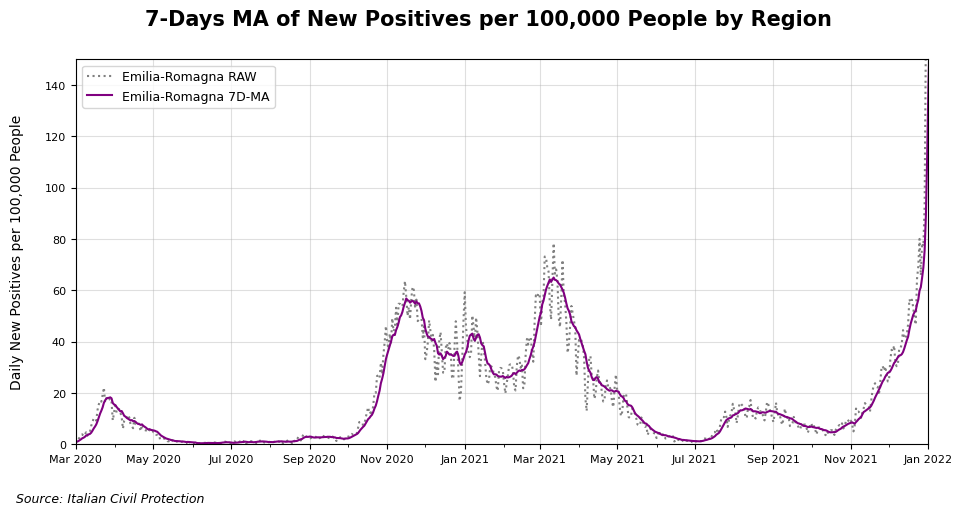

In [86]:
# Plot each province's data on the same plot
fig, ax = plt.subplots(figsize=(11, 5))

# Select only the data for the Emilia-Romagna region
onereg = reg_selection.query('denominazione_regione == "Emilia-Romagna"')

# Plot the raw data and the 7-day moving average for Emilia-Romagna
onereg.plot(x='data', y='nuovi_positivi_100k', label='Emilia-Romagna RAW', ax=ax, color='grey', ls=':' )
onereg.plot(x='data', y='nuovi_positivi_100k_ma', label='Emilia-Romagna 7D-MA', ax=ax, color='purple')

# Format the x-axis with a date formatter and tick locator
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 2  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)

# Format the x- and y-axis tick labels
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.xaxis.set_tick_params(which='minor', labelsize=0)

# Set the x- and y-axis limits
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0, 150))

# Add x- and y-axis labels and a suptitle
plt.xlabel('', labelpad=15)
plt.ylabel('Daily New Positives per 100,000 People', labelpad=15, fontsize=10)
plt.suptitle('7-Days MA of New Positives per 100,000 People by Region', fontsize=15, fontweight='bold')

# Add a grid and legend to the plot
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9}, loc="upper left")

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")


In [87]:
# Save everything at the end
file_path = f'{DATA_PATH}/reg_selection.csv'
with open(file_path, "w") as f:
    reg_selection.to_csv(f)

## Plots <a class='anchor' id='plots'></a>

In [88]:
# Create a 'groupby' object to be used in the plots
grouped = reg_selection.groupby('denominazione_regione')

# Create a copy of the turbo color map
custom_cmap = mpl.colormaps.get_cmap('turbo').copy()

# Modify the last color to be a lighter purple
purple = (0.5, 0.0, 0.5, 1.0) # (R, G, B, A)
light_purple = tuple(0.7 * x + 0.3 for x in purple[:3]) + (1.0,)
custom_cmap.colors[-1] = light_purple

# Create a color map for each province
colors = custom_cmap(np.linspace(0, 1, len(grouped)))


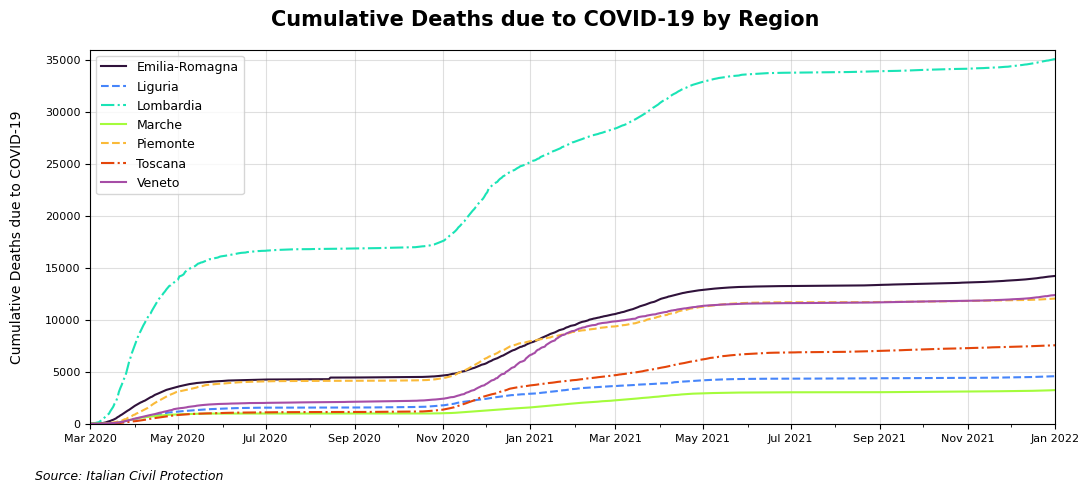

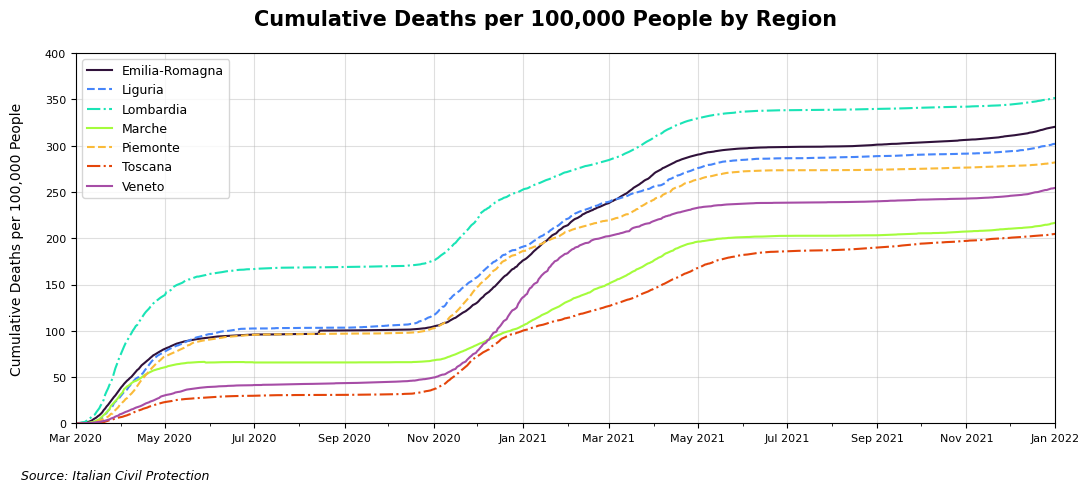

In [89]:
fig, ax = plt.subplots(figsize=(11, 5))
for i, (name, group) in enumerate(grouped):
    # Use the remainder operator to cycle through a list of 3 line styles
    ls = ['-', '--', '-.'][i % 3]
    group.plot(x='data', y='deceduti', label=name, ax=ax, color=colors[i], ls=ls)

# Add plot labels and legend
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 2  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.xaxis.set_tick_params(which='minor', labelsize=0)
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0, 36000))

plt.xlabel('', labelpad=15)
plt.ylabel('Cumulative Deaths due to COVID-19', labelpad=15, fontsize=10)
plt.suptitle('Cumulative Deaths due to COVID-19 by Region', fontsize=15, fontweight='bold')
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9})

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")

save_fig('deaths_reg')


###############################################################################

# Plot each province's data on the same plot
fig, ax = plt.subplots(figsize=(11, 5))
for i, (name, group) in enumerate(grouped):
    # Use a different line style for odd and even indices
    ls = ['-', '--', '-.'][i % 3]
    group.plot(x='data', y='deceduti_100k', label=name, ax=ax, color=colors[i], ls=ls)

# Add plot labels and legend
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 2  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.xaxis.set_tick_params(which='minor', labelsize=0)
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0, 400))

plt.xlabel('', labelpad=15)
plt.ylabel('Cumulative Deaths per 100,000 People', labelpad=15, fontsize=10)
plt.suptitle('Cumulative Deaths per 100,000 People by Region', fontsize=15, fontweight='bold')
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9})

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")

save_fig('deaths_100k_reg')

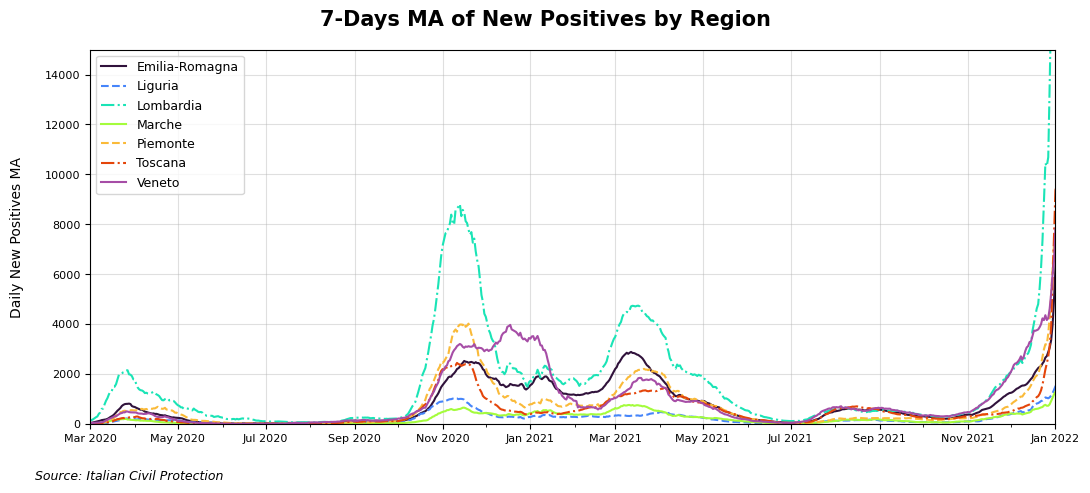

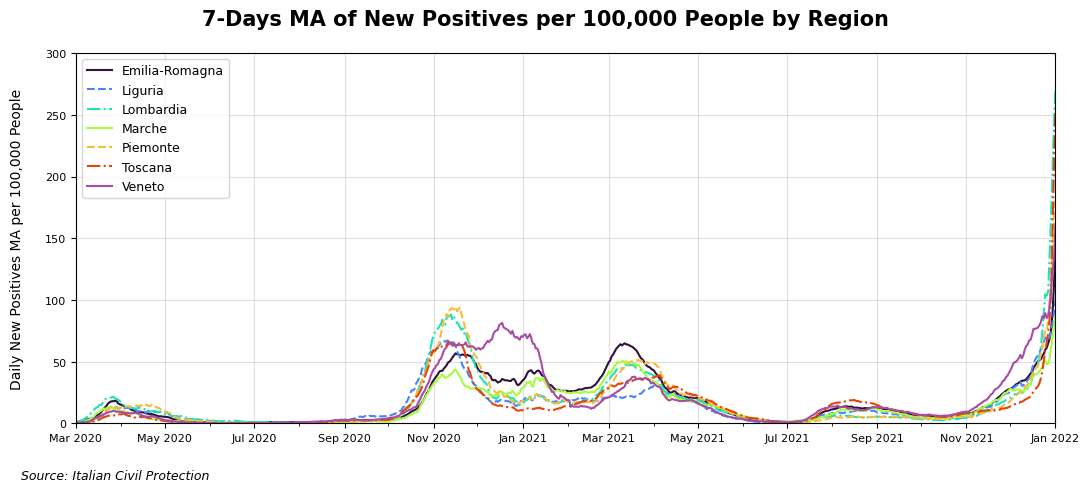

In [90]:
fig, ax = plt.subplots(figsize=(11, 5))
for i, (name, group) in enumerate(grouped):
    # Use a different line style for odd and even indices
    ls = ['-', '--', '-.'][i % 3]
    group.plot(x='data', y='nuovi_positivi_ma', label=name, ax=ax, color=colors[i], ls=ls)

# Add plot labels and legend
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 2  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.xaxis.set_tick_params(which='minor', labelsize=0)
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0, 15000))

plt.xlabel('', labelpad=15)
plt.ylabel('Daily New Positives MA', labelpad=15, fontsize=10)
plt.suptitle('7-Days MA of New Positives by Region', fontsize=15, fontweight='bold')
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9}, loc="upper left")

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")

save_fig('new_positives_reg')


###############################################################################

# Plot each province's data on the same plot
fig, ax = plt.subplots(figsize=(11, 5))
for i, (name, group) in enumerate(grouped):
    # Use a different line style for odd and even indices
    ls = ['-', '--', '-.'][i % 3]
    group.plot(x='data', y='nuovi_positivi_100k_ma', label=name, ax=ax, color=colors[i], ls=ls)

# Add plot labels and legend
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 2  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.xaxis.set_tick_params(which='minor', labelsize=0)
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0, 300))

plt.xlabel('', labelpad=15)
plt.ylabel('Daily New Positives MA per 100,000 People', labelpad=15, fontsize=10)
plt.suptitle('7-Days MA of New Positives per 100,000 People by Region', fontsize=15, fontweight='bold')
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9}, loc="upper left")

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")

save_fig('new_positives_100k_reg')